In [1]:
import numpy as np
import pandas as pd

In [ ]:
inventory = pd.read_csv("../data/preprocessed/inventory.csv")
sales = pd.read_csv("../data/preprocessed/sales_profit.csv")
purchases_prices = pd.read_csv("../data/preprocessed/purchase_prices.csv")
inventory_month = pd.read_csv("../data/eom_inventory_data.csv")
purchases_vendor = pd.read_csv("../data/preprocessed/purchases_vendor.csv")


In [3]:
import platform
import matplotlib.pyplot as plt

try:
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
    elif system_name == 'Windows':  # Windows
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux (예: Ubuntu, Colab)
        plt.rcParams['font.family'] = 'NanumGothic'  # or 'DejaVu Sans'
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    print("그래프의 한글이 깨질 수 있습니다.")

In [4]:
# ---- 3️⃣ store_id별, month별 GM 합계 ----
store_month_gm = (
    sales.groupby(['store_id', 'month'])['gross_profit']
    .sum()
    .reset_index()
)

# ---- 4️⃣ 피벗 테이블 (store_id x month) ----
store_month_gm_pivot = store_month_gm.pivot(index='store_id', columns='month', values='gross_profit')

print("💰 store_id별 월별 매출 총이익 (GM)")
display(store_month_gm_pivot.head())

💰 store_id별 월별 매출 총이익 (GM)


month,1,2,3,4,5,6,7,8,9,10,11,12
store_id,,,,,,,,,,,,
1,141235.474446,131998.031760,155780.469546,133299.628765,143203.034317,149128.868143,145761.604531,136810.794745,158417.277018,137527.080625,143573.537599,200500.017863
2,109477.680644,108973.614697,103487.221598,110519.727333,126569.844993,121097.712539,185074.900109,123496.493416,136944.176638,136263.526373,182089.835388,172425.569648
3,9589.376258,8566.861973,9028.797451,11206.203161,10799.753011,8820.642222,9567.544421,9483.016793,10744.650152,9559.309631,9541.786657,9822.486122
4,62755.680521,58608.721520,62797.529455,62473.612476,64066.241945,62591.347624,66162.649771,54607.017827,67106.370935,61630.002446,66637.890024,97520.896242
5,23345.447797,24442.194077,24207.688956,22936.485472,26031.178280,25773.655327,24850.735103,27045.762129,27258.033258,27219.877789,27764.793834,35655.061856


In [5]:
# store_id별, month별 재고 합계
inv_monthly = inventory_month
inv_monthly = (
    inventory_month.groupby(["store_id", "month"])
    .agg({
        "EOM_Inventory_Quantity": "sum",
        "EOM_Inventory_Value": "sum"
    })
    .reset_index()
)

# 월별로 피벗 → 각 매장의 월별 재고 추이 비교용
inv_monthly_pivot_qty = inv_monthly.pivot(index="store_id", columns="month", values="EOM_Inventory_Quantity")
inv_monthly_pivot_val = inv_monthly.pivot(index="store_id", columns="month", values="EOM_Inventory_Value")

print("📦 월별 재고량 합계 (store_id x month)")
display(inv_monthly_pivot_qty.head())

print("💰 월별 재고금액 합계 (store_id x month)")
display(inv_monthly_pivot_val.head())


📦 월별 재고량 합계 (store_id x month)


month,1,2,3,4,5,6,7,8,9,10,11,12
store_id,,,,,,,,,,,,
1,68156.0,69170.0,64300.0,67986.0,69180.0,66914.0,64853.0,64055.0,67455.0,67380.0,65756.0,69291.0
2,48789.0,49984.0,52033.0,48106.0,46490.0,49010.0,49478.0,45139.0,50964.0,51753.0,48164.0,49449.0
3,8326.0,8122.0,8569.0,7735.0,8155.0,7840.0,7790.0,7952.0,7725.0,8356.0,8203.0,7892.0
4,53475.0,52061.0,52257.0,48086.0,54193.0,53849.0,54909.0,54257.0,51376.0,51152.0,60113.0,52459.0
5,20503.0,20008.0,18302.0,19221.0,18574.0,17169.0,19093.0,18666.0,20480.0,20450.0,20334.0,19609.0


💰 월별 재고금액 합계 (store_id x month)


month,1,2,3,4,5,6,7,8,9,10,11,12
store_id,,,,,,,,,,,,
1,744047.08,739267.29,684380.96,723279.48,742045.34,726757.95,705772.01,678060.40,708364.43,734082.60,718717.66,729929.47
2,548501.27,541261.97,562350.90,528871.76,510506.02,527392.73,545767.05,487096.15,541303.68,576053.62,524789.25,527358.52
3,90125.23,96158.32,95607.48,86837.12,89284.47,88003.48,86106.23,88216.56,84192.04,88242.02,85751.48,84427.20
4,523298.89,517922.83,508513.04,466552.90,541322.21,547971.43,555111.77,559852.74,522317.93,523434.08,627454.06,532212.79
5,171683.58,170320.57,155983.64,166472.35,158780.20,152024.05,162515.05,154704.41,171206.00,173718.83,169103.86,162892.04


In [6]:
sales

,inventory_id,store_id,brand_id,item,size,sales_quantity,sales_dollars,sales_price,sales_date,item_volume,...,dayofweek,volume,purchase_price,retail_price,fifo_purchase_cost,fifo_purchase_order_date,fifo_receiving_date,fifo_invoice_date,gross_profit,gross_margin_rate
0,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,...,0,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,5.011921,0.303937
1,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,...,1,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,10.033841,0.304240
2,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,...,2,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,5.011921,0.303937
3,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,...,0,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,3.011921,0.207862
4,1_SPARROW_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,...,1,750.0,27.34,34.99,27.549423,2023-12-22,2024-01-01,2024-01-06,14.091154,0.201360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825358,9_BLUEBIRD_984,9,984,Patron XO Cafe Liqueur,750mL,1,25.99,25.99,2024-12-17,750.0,...,1,750.0,20.63,25.99,20.630000,NaN,NaN,NaN,4.570000,0.175837
12825359,9_BLUEBIRD_984,9,984,Patron XO Cafe Liqueur,750mL,1,25.99,25.99,2024-12-21,750.0,...,5,750.0,20.63,25.99,20.630000,NaN,NaN,NaN,4.570000,0.175837
12825360,9_BLUEBIRD_984,9,984,Patron XO Cafe Liqueur,750mL,3,77.97,25.99,2024-12-23,750.0,...,0,750.0,20.63,25.99,20.630000,NaN,NaN,NaN,13.720000,0.175965
12825361,9_BLUEBIRD_984,9,984,Patron XO Cafe Liqueur,750mL,1,25.99,25.99,2024-12-24,750.0,...,1,750.0,20.63,25.99,20.630000,NaN,NaN,NaN,4.570000,0.175837


In [7]:
import pandas as pd

# sales 데이터 예시
sales_df = sales.copy()

# 1️⃣ 브랜드별 총 집계
brand_grouped = sales_df.groupby('brand_id').agg(
    total_sales=('sales_quantity','sum'),
    total_dollars=('sales_dollars','sum'),
    total_gm=('gross_profit','sum'),
    avg_price=('sales_price','mean')
).reset_index()

# 2️⃣ 매출총이익률 계산
brand_grouped['gm_margin'] = brand_grouped['total_gm'] / brand_grouped['total_dollars']

# 3️⃣ 월별 판매량 표준편차 계산
monthly_sales = sales_df.groupby(['brand_id','month'])['sales_quantity'].sum().unstack(fill_value=0)
monthly_std = monthly_sales.std(axis=1).reset_index().rename(columns={0:'month_std'})

# 4️⃣ merge
brand_grouped = brand_grouped.merge(monthly_std, on='brand_id', how='left')

# 5️⃣ 군집화용 데이터프레임
cluster_df = brand_grouped[['brand_id','avg_price','total_sales','gm_margin','month_std']]
cluster_df

,brand_id,avg_price,total_sales,gm_margin,month_std
0,58,12.587496,3446,0.191612,55.842039
1,60,10.500284,1775,0.222639,240.608115
2,61,13.990000,312,0.184123,6.928203
3,62,38.379953,3125,0.230609,95.881990
4,63,40.435205,2778,0.225402,79.569866
...,...,...,...,...,...
11232,90089,119.990000,159,0.347871,10.938880
11233,90090,649.990000,15,0.310115,1.484771
11234,90604,119.990000,76,0.341959,10.030257
11235,90609,24.990000,83,0.315614,5.728054


In [8]:
# inventory_month 예시: store_id, brand_id, month, EOM_Inventory_Quantity
# brand_id 기준으로 통합
brand_monthly = inventory_month.groupby(['brand_id','month'])['EOM_Inventory_Quantity'].sum().reset_index()

# pivot: brand_id x month
brand_monthly_pivot = brand_monthly.pivot(index='brand_id', columns='month', values='EOM_Inventory_Quantity').fillna(0)

# 월별 재고량 변동성 계산 (표준편차)
brand_monthly_pivot['inv_std'] = brand_monthly_pivot.std(axis=1)
brand_monthly_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,inv_std
brand_id,,,,,,,,,,,,,
58,293.0,293.0,336.0,318.0,316.0,344.0,307.0,308.0,321.0,304.0,360.0,328.0,20.297783
60,168.0,87.0,68.0,49.0,36.0,31.0,28.0,28.0,30.0,898.0,463.0,121.0,260.643653
61,24.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,5.116817
62,439.0,421.0,443.0,407.0,421.0,466.0,448.0,548.0,516.0,524.0,522.0,452.0,47.686714
63,411.0,369.0,375.0,316.0,412.0,396.0,391.0,440.0,455.0,430.0,433.0,417.0,37.825256


In [9]:
# 6️⃣ cluster_df에 inv_std 병합
cluster_df = cluster_df.merge(
    brand_monthly_pivot['inv_std'].reset_index(),
    on='brand_id',
    how='left'
)

# 결측치 처리
cluster_df['inv_std'] = cluster_df['inv_std'].fillna(0)

# 7️⃣ 최종 군집화용 데이터 확인
cluster_df.head()

,brand_id,avg_price,total_sales,gm_margin,month_std,inv_std
0,58,12.587496,3446,0.191612,55.842039,20.297783
1,60,10.500284,1775,0.222639,240.608115,260.643653
2,61,13.990000,312,0.184123,6.928203,5.116817
3,62,38.379953,3125,0.230609,95.881990,47.686714
4,63,40.435205,2778,0.225402,79.569866,37.825256


⚠ DBSCAN: 유효 군집이 2개 미만이라 실루엣 계산 불가
cluster_dbscan_log
 0    11183
-1       54
Name: count, dtype: int64


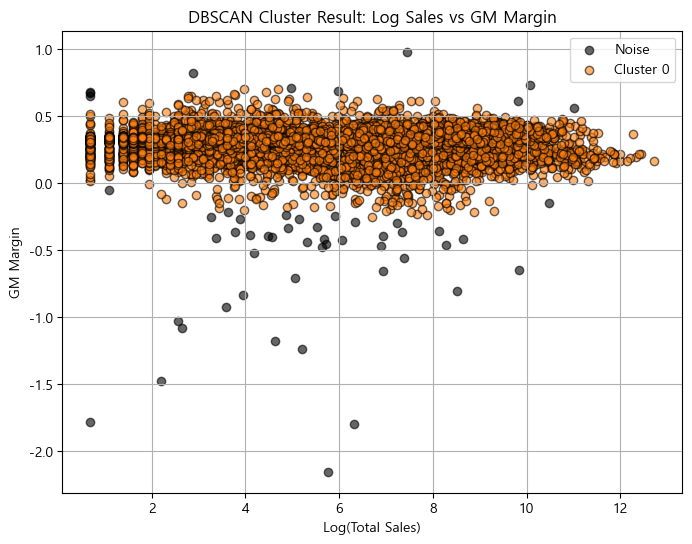

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# 1️⃣ 군집화용 데이터 선택
cluster_df['log_sales'] = np.log1p(cluster_df['total_sales'])  # 로그 판매량 추가
X_scaled = StandardScaler().fit_transform(cluster_df[['log_sales', 'gm_margin']])

# 2️⃣ DBSCAN 모델 생성
# eps, min_samples는 데이터 분포에 맞게 조정 가능
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
labels_dbscan = dbscan.fit_predict(X_scaled)

# 3️⃣ 결과를 데이터프레임에 추가
cluster_df['cluster_dbscan_log'] = labels_dbscan

# 4️⃣ 실루엣 점수 확인 (노이즈 제외)
mask = labels_dbscan != -1
if len(np.unique(labels_dbscan[mask])) > 1:
    sil_score = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"✅ DBSCAN (Log Sales) 실루엣 계수 (노이즈 제외): {sil_score:.4f}")
else:
    print("⚠ DBSCAN: 유효 군집이 2개 미만이라 실루엣 계산 불가")

# 5️⃣ 군집 분포 확인
print(cluster_df['cluster_dbscan_log'].value_counts())

# 6️⃣ 시각화
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels_dbscan)
colors = plt.cm.tab10(range(len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = labels_dbscan == label
    color = 'k' if label == -1 else colors[i]
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(
        cluster_df.loc[mask, 'log_sales'],
        cluster_df.loc[mask, 'gm_margin'],
        c=[color],
        label=label_name,
        alpha=0.6,
        edgecolor='k'
    )

plt.xlabel('Log(Total Sales)')
plt.ylabel('GM Margin')
plt.title('DBSCAN Cluster Result: Log Sales vs GM Margin')
plt.legend()
plt.grid(True)
plt.show()


* 판매량이 매우 적거나 GM 비율이 극단적이거나 판매량과 GM 비율 조합이 다른 브랜드와 멀리 떨어져 있음 -> 소량 판매 브랜드, 신제품, 단종 브랜드
* 핵심 매출 브랜드

✅ KMeans (Log Sales) 실루엣 계수: 0.4205
cluster_kmeans_log
1    5836
0    5401
Name: count, dtype: int64
                    log_sales  gm_margin
cluster_kmeans_log                      
0                    7.627963   0.264678
1                    3.350945   0.314487


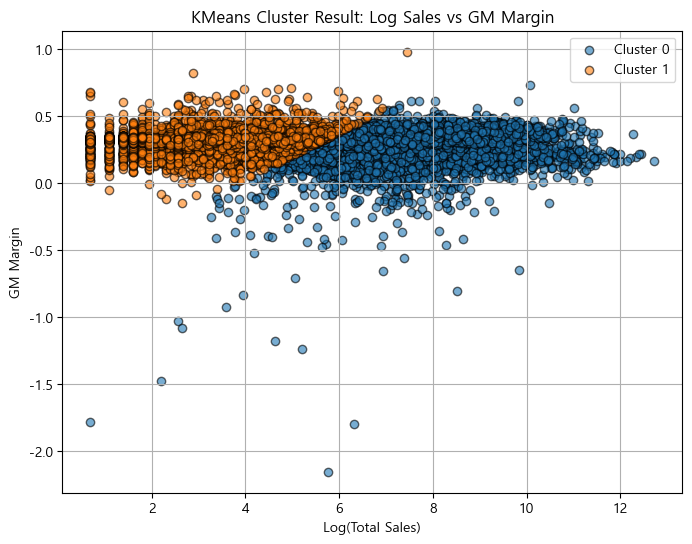

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1️⃣ 군집화용 데이터 선택
X = cluster_df[['total_sales', 'gm_margin']].copy()

# 2️⃣ 판매량 로그 변환
cluster_df['log_sales'] = np.log1p(cluster_df['total_sales'])  # cluster_df에 직접 추가
X_scaled = StandardScaler().fit_transform(cluster_df[['log_sales', 'gm_margin']])

# 3️⃣ KMeans 모델 생성 (군집 2개)
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# 4️⃣ 군집 결과 데이터프레임에 추가
cluster_df['cluster_kmeans_log'] = labels_kmeans

# 5️⃣ 실루엣 점수 확인
sil_score = silhouette_score(X_scaled, labels_kmeans)
print(f"✅ KMeans (Log Sales) 실루엣 계수: {sil_score:.4f}")

# 6️⃣ 군집 분포 확인
print(cluster_df['cluster_kmeans_log'].value_counts())

# 7️⃣ 군집별 평균 확인
cluster_summary = cluster_df.groupby('cluster_kmeans_log')[['log_sales','gm_margin']].mean()
print(cluster_summary)

# 8️⃣ 시각화
plt.figure(figsize=(8,6))
unique_labels = cluster_df['cluster_kmeans_log'].unique()
colors = plt.cm.tab10(range(len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = cluster_df['cluster_kmeans_log'] == label
    plt.scatter(
        cluster_df.loc[mask, 'log_sales'],
        cluster_df.loc[mask, 'gm_margin'],
        c=[colors[i]],
        label=f'Cluster {label}',
        alpha=0.6,
        edgecolor='k'
    )

plt.xlabel('Log(Total Sales)')
plt.ylabel('GM Margin')
plt.title('KMeans Cluster Result: Log Sales vs GM Margin')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
cluster_df

,brand_id,avg_price,total_sales,gm_margin,month_std,inv_std,log_sales,cluster_dbscan_log,cluster_kmeans_log
0,58,12.587496,3446,0.191612,55.842039,20.297783,8.145260,0,0
1,60,10.500284,1775,0.222639,240.608115,260.643653,7.482119,0,0
2,61,13.990000,312,0.184123,6.928203,5.116817,5.746203,0,0
3,62,38.379953,3125,0.230609,95.881990,47.686714,8.047510,0,0
4,63,40.435205,2778,0.225402,79.569866,37.825256,7.929846,0,0
...,...,...,...,...,...,...,...,...,...
11232,90089,119.990000,159,0.347871,10.938880,38.796673,5.075174,0,1
11233,90090,649.990000,15,0.310115,1.484771,4.420167,2.772589,0,1
11234,90604,119.990000,76,0.341959,10.030257,0.000000,4.343805,0,1
11235,90609,24.990000,83,0.315614,5.728054,0.000000,4.430817,0,1


In [13]:
# 1️⃣ 매출액 계산 (이미 계산된 total_revenue도 활용 가능)
cluster_df['total_revenue'] = cluster_df['avg_price'] * cluster_df['total_sales']

# 2️⃣ cluster_dbscan_log 기준 군집별 요약 통계
cluster_summary_log = cluster_df.groupby('cluster_dbscan_log').agg(
    avg_price_mean=('avg_price','mean'),
    month_std_mean=('month_std','mean'),
    inv_std_mean=('inv_std','mean'),
    gm_margin_mean=('gm_margin','mean'),
    total_sales_sum=('total_sales','sum'),
    total_revenue_sum=('total_revenue','sum'),
    brand_count=('brand_id','nunique')
).reset_index()

# 3️⃣ 전체 대비 매출 비중 계산 (매출액 기준)
total_revenue_all = cluster_summary_log['total_revenue_sum'].sum()
cluster_summary_log['sales_ratio(%)'] = (cluster_summary_log['total_revenue_sum'] / total_revenue_all * 100).round(2)

# 4️⃣ 보기 좋게 매출 비중 기준 정렬
cluster_summary_log = cluster_summary_log.sort_values('sales_ratio(%)', ascending=False)

cluster_summary_log

,cluster_dbscan_log,avg_price_mean,month_std_mean,inv_std_mean,gm_margin_mean,total_sales_sum,total_revenue_sum,brand_count,sales_ratio(%)
1,0,34.908210,115.359450,76.239481,0.293723,32728772,4.556484e+08,11183,99.86
0,-1,15.502439,209.396628,77.132780,-0.367297,189104,6.513270e+05,54,0.14


### 2단계

In [14]:
# inventory_month 예시: store_id, brand_id, month, EOM_Inventory_Quantity
# brand_id 기준으로 통합
brand_monthly = inventory_month.groupby(['brand_id','month'])['EOM_Inventory_Quantity'].sum().reset_index()

# pivot: brand_id x month
brand_monthly_pivot = brand_monthly.pivot(index='brand_id', columns='month', values='EOM_Inventory_Quantity').fillna(0)

# 월별 재고량 변동성 계산 (표준편차)
brand_monthly_pivot['inv_std'] = brand_monthly_pivot.std(axis=1)
brand_monthly_pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,inv_std
brand_id,,,,,,,,,,,,,
58,293.0,293.0,336.0,318.0,316.0,344.0,307.0,308.0,321.0,304.0,360.0,328.0,20.297783
60,168.0,87.0,68.0,49.0,36.0,31.0,28.0,28.0,30.0,898.0,463.0,121.0,260.643653
61,24.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,5.116817
62,439.0,421.0,443.0,407.0,421.0,466.0,448.0,548.0,516.0,524.0,522.0,452.0,47.686714
63,411.0,369.0,375.0,316.0,412.0,396.0,391.0,440.0,455.0,430.0,433.0,417.0,37.825256


In [15]:
# 1단계 cluster 0 브랜드만 선택 (예시)
cluster0_df = cluster_df[cluster_df['cluster_dbscan_log'] == 0].copy()

# 군집화용 데이터 확인
X_step2 = cluster0_df[['avg_price','month_std','inv_std']]
X_step2.head()

,avg_price,month_std,inv_std
0,12.587496,55.842039,20.297783
1,10.500284,240.608115,260.643653
2,13.990000,6.928203,5.116817
3,38.379953,95.881990,47.686714
4,40.435205,79.569866,37.825256


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_step2)

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 최적 k = 4
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# 실루엣 계수 계산
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"✅ 실루엣 계수 (Silhouette Score): {sil_score:.4f}")

✅ 실루엣 계수 (Silhouette Score): 0.8630


In [18]:
# 결과를 데이터프레임에 추가
cluster0_df['kmeans_cluster'] = cluster_labels

# 군집별 평균 확인
cluster0_df.groupby('kmeans_cluster')[['avg_price','month_std','inv_std']].mean()

# 군집별 평균 + 개수 확인
cluster_summary = cluster0_df.groupby('kmeans_cluster').agg(
    avg_price_mean=('avg_price','mean'),
    month_std_mean=('month_std','mean'),
    inv_std_mean=('inv_std','mean'),
    count=('brand_id','count')  # 브랜드 개수
).reset_index()

cluster_summary

,kmeans_cluster,avg_price_mean,month_std_mean,inv_std_mean,count
0,0,32.236652,64.915141,42.470162,10770
1,1,3458.050606,0.568787,0.793920,11
2,2,12.813964,1469.956227,983.019237,402


In [19]:
cluster0_df['total_dollars'] = cluster0_df['avg_price'] * cluster0_df['total_sales']

# 군집별 총 매출
cluster_sales = cluster0_df.groupby('kmeans_cluster')['total_dollars'].sum().reset_index()
cluster_sales.rename(columns={'total_dollars':'cluster_total_dollars'}, inplace=True)

# 전체 매출
total_dollars_all = cluster0_df['total_dollars'].sum()

# 비중 계산
cluster_sales['sales_ratio'] = cluster_sales['cluster_total_dollars'] / total_dollars_all * 100

# 출력
cluster_sales


,kmeans_cluster,cluster_total_dollars,sales_ratio
0,0,2.708653e+08,59.446119
1,1,1.640541e+05,0.036005
2,2,1.846191e+08,40.517876


In [20]:
# 1️⃣ cluster_df의 군집별 brand_id 목록
cluster_df_groups = (
    cluster_df.groupby('cluster_dbscan_log')['brand_id']
    .apply(list)
    .reset_index()
    .rename(columns={'brand_id': 'brand_id_list'})
)

# 2️⃣ cluster0_df의 군집별 brand_id 목록
cluster0_df_groups = (
    cluster0_df.groupby('kmeans_cluster')['brand_id']
    .apply(list)
    .reset_index()
    .rename(columns={'brand_id': 'brand_id_list'})
)

# 3️⃣ 각 군집별 브랜드 개수 추가
cluster_df_groups['brand_count'] = cluster_df_groups['brand_id_list'].apply(len)
cluster0_df_groups['brand_count'] = cluster0_df_groups['brand_id_list'].apply(len)

# 4️⃣ 결과 확인
print("📊 DBSCAN 군집별 brand_id 리스트")
display(cluster_df_groups)

print("\n📊 KMeans 군집별 brand_id 리스트")
display(cluster0_df_groups)

📊 DBSCAN 군집별 brand_id 리스트


,cluster_dbscan_log,brand_id_list,brand_count
0,-1,"[749, 814, 1297, 1771, 2150, 2166, 2277, 3508,...",54
1,0,"[58, 60, 61, 62, 63, 70, 72, 75, 77, 79, 82, 8...",11183



📊 KMeans 군집별 brand_id 리스트


,kmeans_cluster,brand_id_list,brand_count
0,0,"[58, 60, 61, 62, 63, 70, 72, 75, 77, 79, 82, 8...",10770
1,1,"[423, 500, 1176, 1251, 1300, 1991, 2367, 4109,...",11
2,2,"[126, 273, 381, 508, 540, 811, 1001, 1003, 106...",402


In [24]:
sales.columns

Index(['inventory_id', 'store_id', 'brand_id', 'item', 'size',
       'sales_quantity', 'sales_dollars', 'sales_price', 'sales_date',
       'item_volume', 'classification', 'excise_tax', 'vendor_id', 'vendor',
       'month', 'dayofweek', 'volume', 'purchase_price', 'retail_price',
       'fifo_purchase_cost', 'fifo_purchase_order_date', 'fifo_receiving_date',
       'fifo_invoice_date', 'gross_profit', 'gross_margin_rate'],
      dtype='object')

In [25]:
pd.set_option('display.max_columns', None)
sales.head(3)

,inventory_id,store_id,brand_id,item,size,sales_quantity,sales_dollars,sales_price,sales_date,item_volume,classification,excise_tax,vendor_id,vendor,month,dayofweek,volume,purchase_price,retail_price,fifo_purchase_cost,fifo_purchase_order_date,fifo_receiving_date,fifo_invoice_date,gross_profit,gross_margin_rate
0,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,0,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,5.011921,0.303937
1,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY,1,1,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,10.033841,0.304240
2,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,2,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,5.011921,0.303937


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# cluster0_df_groups: kmeans_cluster, brand_id_list
cluster2_brands = cluster0_df_groups.loc[cluster0_df_groups['kmeans_cluster']==2, 'brand_id_list'].values[0]

# sales 데이터에서 해당 브랜드만 추출
sales_cluster2 = sales[sales['brand_id'].isin(cluster2_brands)]

store1_sales = sales_cluster2[sales_cluster2['store_id']==1]


# 3-2 lead_time 계산
store1_sales['fifo_purchase_order_date'] = pd.to_datetime(store1_sales['fifo_purchase_order_date'])
store1_sales['fifo_receiving_date'] = pd.to_datetime(store1_sales['fifo_receiving_date'])
store1_sales['lead_time'] = (store1_sales['fifo_receiving_date'] - store1_sales['fifo_purchase_order_date']).dt.days
store1_sales['lead_time'] = store1_sales['lead_time'].fillna(store1_sales['lead_time'].mean())

# 3-3 로그가격
store1_sales['log_price'] = np.log(store1_sales['sales_price'])

# 3-4 month one-hot
month_dummies = pd.get_dummies(store1_sales['month'], prefix='month')
store1_sales = pd.concat([store1_sales, month_dummies], axis=1)

# 3-5 cluster_df merge (brand 기준)
store1_model_df = store1_sales.merge(cluster_df, on='brand_id', how='left')

feature_cols = ['log_price', 'avg_price', 'gm_margin', 'month_std', 'inv_std', 'lead_time'] + list(month_dummies.columns)
X = store1_model_df[feature_cols]
y = store1_model_df['sales_quantity']

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1️⃣ 모델 학습
linreg = LinearRegression()
linreg.fit(X_scaled, y)

# 2️⃣ 예측
y_pred_vanilla = linreg.predict(X_scaled)

# 3️⃣ 예측치를 기존 sales 데이터에 반영
store1_model_df['predicted_sales_quantity_vanilla'] = y_pred_vanilla

C:\Users\Jaesung\AppData\Local\Temp\ipykernel_10780\1232177424.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_sales['fifo_purchase_order_date'] = pd.to_datetime(store1_sales['fifo_purchase_order_date'])
C:\Users\Jaesung\AppData\Local\Temp\ipykernel_10780\1232177424.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_sales['fifo_receiving_date'] = pd.to_datetime(store1_sales['fifo_receiving_date'])
C:\Users\Jaesung\AppData\Local\Temp\ipykernel_10780\1232177424.py:22: SettingWithCopyWarni

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = store1_model_df['sales_quantity']
y_pred = store1_model_df['predicted_sales_quantity_vanilla']

# R²
r2 = r2_score(y_true, y_pred)

# RMSE 계산 (직접 sqrt)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")

R²: 0.223
RMSE: 4.438
MAPE: 105.93%


In [58]:
!pip install --upgrade statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.6 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.6 MB 1.2 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.6 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.6 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.6 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 2.9/9.6 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.4/9.6 MB 1.8 MB/s eta 0:00:04
   ----------------- ---------------------- 4.2/9.6 MB 2.0 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.6 MB 2.2 MB/s eta 0:00:03
   ------------------------ --------------- 5.8/9.6 MB 2.3 MB/s eta 0:00:02
   -----------------------

C:\Users\Jaesung\AppData\Local\Temp\ipykernel_10780\1046529999.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_sales['fifo_purchase_order_date'] = pd.to_datetime(store1_sales['fifo_purchase_order_date'])
C:\Users\Jaesung\AppData\Local\Temp\ipykernel_10780\1046529999.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_sales['fifo_receiving_date'] = pd.to_datetime(store1_sales['fifo_receiving_date'])
C:\Users\Jaesung\AppData\Local\Temp\ipykernel_10780\1046529999.py:23: SettingWithCopyWarni


=== Vanilla Regression Residual Diagnostics ===
Shapiro-Wilk: stat=0.727, p=0.000 (p>0.05 정규성 만족)


c:\Users\Jaesung\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56462.
  res = hypotest_fun_out(*samples, **kwds)


Breusch-Pagan: LM stat=1329.966, p=0.000 (p>0.05 등분산성 만족)
Durbin-Watson: 1.477 (1.5~2.5 정상)


c:\Users\Jaesung\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF (10 이상 주의):
     feature  VIF
9    month_4  inf
10   month_5  inf
16  month_11  inf
15  month_10  inf
14   month_9  inf

=== Ridge Regression Residual Diagnostics ===
Shapiro-Wilk: stat=0.727, p=0.000 (p>0.05 정규성 만족)


c:\Users\Jaesung\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56462.
  res = hypotest_fun_out(*samples, **kwds)


Breusch-Pagan: LM stat=1329.969, p=0.000 (p>0.05 등분산성 만족)
Durbin-Watson: 1.477 (1.5~2.5 정상)


c:\Users\Jaesung\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF (10 이상 주의):
     feature  VIF
9    month_4  inf
10   month_5  inf
16  month_11  inf
15  month_10  inf
14   month_9  inf

=== Lasso Regression Residual Diagnostics ===
Shapiro-Wilk: stat=0.714, p=0.000 (p>0.05 정규성 만족)
Breusch-Pagan: LM stat=1347.834, p=0.000 (p>0.05 등분산성 만족)
Durbin-Watson: 1.463 (1.5~2.5 정상)


c:\Users\Jaesung\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56462.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Jaesung\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF (10 이상 주의):
     feature  VIF
9    month_4  inf
10   month_5  inf
16  month_11  inf
15  month_10  inf
14   month_9  inf


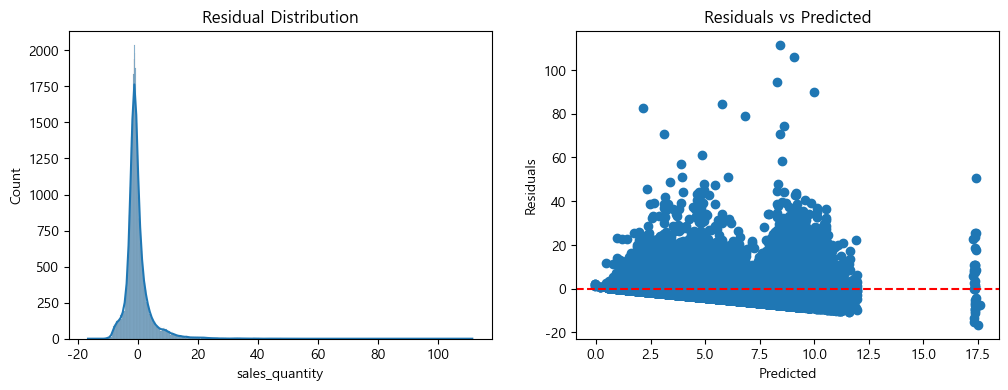

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# 1️⃣ 데이터 준비
# ======================
cluster2_brands = cluster0_df_groups.loc[cluster0_df_groups['kmeans_cluster']==2, 'brand_id_list'].values[0]
sales_cluster2 = sales[sales['brand_id'].isin(cluster2_brands)]
store1_sales = sales_cluster2[sales_cluster2['store_id']==1]

# lead_time 계산
store1_sales['fifo_purchase_order_date'] = pd.to_datetime(store1_sales['fifo_purchase_order_date'])
store1_sales['fifo_receiving_date'] = pd.to_datetime(store1_sales['fifo_receiving_date'])
store1_sales['lead_time'] = (store1_sales['fifo_receiving_date'] - store1_sales['fifo_purchase_order_date']).dt.days
store1_sales['lead_time'] = store1_sales['lead_time'].fillna(store1_sales['lead_time'].mean())

# 로그 가격
store1_sales['log_price'] = np.log(store1_sales['sales_price'])

# month one-hot
month_dummies = pd.get_dummies(store1_sales['month'], prefix='month')
store1_sales = pd.concat([store1_sales, month_dummies], axis=1)

# cluster_df merge
store1_model_df = store1_sales.merge(cluster_df, on='brand_id', how='left')

# feature 설정
feature_cols = ['log_price', 'avg_price', 'gm_margin', 'month_std', 'inv_std', 'lead_time'] + list(month_dummies.columns)
X = store1_model_df[feature_cols]
y = store1_model_df['sales_quantity']

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================
# 2️⃣ 모델 학습
# ======================
models = {
    "Vanilla": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000)
}

predictions = {}
for name, model in models.items():
    model.fit(X_scaled, y)
    predictions[name] = model.predict(X_scaled)
    store1_model_df[f'predicted_{name}'] = predictions[name]

# ======================
# 3️⃣ 잔차 5대 검정
# ======================
X_sm = sm.add_constant(X_scaled)  # statsmodels용
for name, y_pred in predictions.items():
    print(f"\n=== {name} Regression Residual Diagnostics ===")
    residuals = y - y_pred
    
    # 1. 정규성 (Shapiro-Wilk)
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk: stat={stat:.3f}, p={p:.3f} (p>0.05 정규성 만족)")

    # 2. 등분산성 (Breusch-Pagan)
    model_sm = sm.OLS(y, X_sm).fit()
    bp_test = het_breuschpagan(residuals, X_sm)
    print(f"Breusch-Pagan: LM stat={bp_test[0]:.3f}, p={bp_test[1]:.3f} (p>0.05 등분산성 만족)")

    # 3. 자기상관 (Durbin-Watson)
    dw = durbin_watson(residuals)
    print(f"Durbin-Watson: {dw:.3f} (1.5~2.5 정상)")

    # 4. 다중공선성 (VIF)
    vif_data = pd.DataFrame()
    vif_data['feature'] = feature_cols
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    print("VIF (10 이상 주의):")
    print(vif_data.sort_values('VIF', ascending=False).head(5))

# ======================
# 4️⃣ 잔차 시각화 (Vanilla 기준)
# ======================
residuals = y - predictions['Vanilla']
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")

plt.subplot(1,2,2)
plt.scatter(predictions['Vanilla'], residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.show()

# ======================
# 5️⃣ 개선 제안
# ======================
# - 정규성/등분산성 문제: y 로그 변환 log1p(y)
# - 자기상관 문제: lag feature 추가 (sales_quantity_lag1, lag7)
# - 다중공선성 문제: VIF>10 feature 제거 or Lasso 사용
# - 독립성 문제: store/brand fixed effect 적용


In [60]:
y_log = np.log1p(y)
month_dummies = pd.get_dummies(store1_sales['month'], prefix='month', drop_first=True)
store1_sales = store1_sales.sort_values(['brand_id','sales_date'])
store1_sales['lag1'] = store1_sales.groupby('brand_id')['sales_quantity'].shift(1).fillna(0)
store1_sales['lag7'] = store1_sales.groupby('brand_id')['sales_quantity'].shift(7).fillna(0)


In [ ]:
# 1️⃣ 로그 변환
store1_model_df['sales_quantity_log'] = np.log1p(store1_model_df['sales_quantity'])

# 2️⃣ month drop_first
month_dummies = pd.get_dummies(store1_sales['month'], prefix='month', drop_first=True)
store1_model_df = pd.concat([store1_model_df, month_dummies], axis=1)

# lag feature
store1_model_df = store1_model_df.sort_values(['brand_id','sales_date'])
store1_model_df['lag1'] = store1_model_df.groupby('brand_id')['sales_quantity'].shift(1).fillna(0)
store1_model_df['lag7'] = store1_model_df.groupby('brand_id')['sales_quantity'].shift(7).fillna(0)

# feature
feature_cols = ['log_price', 'avg_price', 'gm_margin', 'month_std', 'inv_std', 'lead_time', 'lag1', 'lag7'] + list(month_dummies.columns)
X = store1_model_df[feature_cols]
y_log = store1_model_df['sales_quantity_log']

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ 모델 학습
models = {
    "Vanilla": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000)
}

predictions = {}
for name, model in models.items():
    model.fit(X_scaled, y_log)
    predictions[name] = model.predict(X_scaled)
    store1_model_df[f'predicted_{name}_log'] = predictions[name]

# 6️⃣ 잔차 검정
X_sm = sm.add_constant(X_scaled)
for name, y_pred in predictions.items():
    print(f"\n=== {name} Regression Residual Diagnostics ===")
    residuals = y_log - y_pred
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")
    model_sm = sm.OLS(y_log, X_sm).fit()
    bp_test = het_breuschpagan(residuals, X_sm)
    print(f"Breusch-Pagan: LM stat={bp_test[0]:.3f}, p={bp_test[1]:.3f}")
    dw = durbin_watson(residuals)
    print(f"Durbin-Watson: {dw:.3f}")
    vif_data = pd.DataFrame({'feature': feature_cols,
                             'VIF':[variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]})
    print("Top VIF:")
    print(vif_data.sort_values('VIF', ascending=False).head(5))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [45]:
# 예측 매출 = 예측 수량 * 실제 판매 가격
store1_model_df['predicted_sales_dollars'] = store1_model_df['predicted_sales_quantity'] * store1_model_df['sales_price']

# 기존 매출
total_actual_sales = store1_model_df['sales_dollars'].sum()

# 예측 매출
total_predicted_sales = store1_model_df['predicted_sales_dollars'].sum()

# 매출 차이
sales_diff = total_predicted_sales - total_actual_sales
print(f"예상 매출 증가: {sales_diff:.2f}")

# 예측 GM = (예측 수량 * (판매가 - purchase_cost))
store1_model_df['predicted_gm'] = store1_model_df['predicted_sales_quantity'] * (store1_model_df['sales_price'] - store1_model_df['fifo_purchase_cost'])

# 기존 GM
total_actual_gm = store1_model_df['gross_profit'].sum()

# 예측 GM
total_predicted_gm = store1_model_df['predicted_gm'].sum()

# GM 차이
gm_diff = total_predicted_gm - total_actual_gm
print(f"예상 총이익 증가: {gm_diff:.2f}")

예상 매출 증가: 19902.09
예상 총이익 증가: 121886.89


In [ ]:
# 예: 원래 sales_quantity 대비 변화율 계산
store1_model_df['sales_change'] = store1_model_df['predicted_sales_quantity'] - store1_model_df['sales_quantity']


In [34]:
store_features

,store_id,brand_id,sales_price,month,dayofweek,volume,fifo_purchase_cost,sales_quantity,avg_lead_time
0,1,58,12.590000,7.342857,2.428571,750.0,9.373751,1.457143,9.028571
1,1,60,10.590000,7.933333,2.733333,750.0,7.429545,2.866667,12.000000
2,1,62,38.634737,6.776316,3.750000,750.0,28.719449,1.513158,7.894737
3,1,63,40.656667,6.812500,3.187500,750.0,30.514840,1.145833,6.541667
4,1,72,34.990000,7.000000,0.000000,750.0,26.110000,1.000000,NaN
...,...,...,...,...,...,...,...,...,...
234607,81,47014,13.990000,12.000000,1.000000,750.0,8.188123,1.000000,9.000000
234608,81,47090,23.990000,10.500000,3.000000,750.0,15.611584,1.500000,10.000000
234609,81,90087,469.990000,8.000000,4.000000,750.0,312.096000,3.000000,3.000000
234610,81,90088,134.990000,8.000000,4.000000,750.0,93.306000,3.000000,3.000000


In [33]:
X

,sales_price,month,dayofweek,volume,avg_lead_time,fifo_purchase_cost
0,12.590000,7.342857,2.428571,750.0,9.028571,9.373751
1,10.590000,7.933333,2.733333,750.0,12.000000,7.429545
2,38.634737,6.776316,3.750000,750.0,7.894737,28.719449
3,40.656667,6.812500,3.187500,750.0,6.541667,30.514840
4,34.990000,7.000000,0.000000,750.0,NaN,26.110000
...,...,...,...,...,...,...
234607,13.990000,12.000000,1.000000,750.0,9.000000,8.188123
234608,23.990000,10.500000,3.000000,750.0,10.000000,15.611584
234609,469.990000,8.000000,4.000000,750.0,3.000000,312.096000
234610,134.990000,8.000000,4.000000,750.0,3.000000,93.306000


In [32]:
X.isnull().sum()

sales_price               0
month                     0
dayofweek                 0
volume                    0
avg_lead_time         25233
fifo_purchase_cost        0
dtype: int64

In [37]:
sales.head()

,inventory_id,store_id,brand_id,item,size,sales_quantity,sales_dollars,sales_price,sales_date,item_volume,classification,excise_tax,vendor_id,vendor,month,dayofweek,volume,purchase_price,retail_price,fifo_purchase_cost,fifo_purchase_order_date,fifo_receiving_date,fifo_invoice_date,gross_profit,gross_margin_rate,lead_time
0,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,0,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,5.011921,0.303937,8.0
1,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY,1,1,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,10.033841,0.304240,8.0
2,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,2,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,5.011921,0.303937,8.0
3,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,0,750.0,10.65,16.49,10.688079,2024-09-23,2024-10-01,2024-10-06,3.011921,0.207862,8.0
4,1_SPARROW_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,1,750.0,27.34,34.99,27.549423,2023-12-22,2024-01-01,2024-01-06,14.091154,0.201360,10.0


In [36]:
sales.shape

(12825363, 26)

In [ ]:
# 릿지 / 라쏘